#*Dataset extraído do Kaggle*

https://www.kaggle.com/brjapon/gearbox-fault-diagnosis

Carga = 0

In [185]:
import pandas as pd
from sklearn import model_selection
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#algoritmos
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
#Importando a biblioteca das métricas
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#para fazer o cross validation
from sklearn.model_selection import cross_val_score


In [186]:
url_dados = 'https://github.com/rslmartins/gearbox-failure/blob/main/BrokenTooth/b30hz0.csv?raw=true'

data1 = pd.read_csv(url_dados, sep= ',')

In [187]:
url_dados = 'https://github.com/rslmartins/gearbox-failure/blob/main/Healthy/h30hz0.csv?raw=true'

data2 = pd.read_csv(url_dados, sep= ',')

In [188]:
# inserindo o atributo de classe defeituosa
data1['class']= data1['a1'].apply(lambda x:1)

In [189]:
data1.describe()

,a1,a2,a3,a4,class
count,88320.000000,88320.000000,88320.000000,88320.000000,88320.0
mean,-0.000654,0.008212,0.003123,-0.005046,1.0
std,3.554499,3.922028,3.100732,3.331703,0.0
min,-21.826000,-22.440300,-17.883600,-23.450000,1.0
25%,-2.090257,-2.059417,-1.629942,-1.783825,1.0
50%,0.014590,0.088157,-0.007156,0.023381,1.0
75%,2.078990,2.216633,1.638803,1.797045,1.0
max,19.048900,19.456800,17.179000,21.069600,1.0


In [190]:
# inserindo o atributo de classe ok
data2['class']= data2['a1'].apply(lambda x:0)

In [191]:
data2.describe()

,a1,a2,a3,a4,class
count,88832.000000,88832.000000,88832.000000,88832.000000,88832.0
mean,-0.022179,0.007026,-0.039046,-0.007266,0.0
std,5.946117,4.156326,3.251874,3.361671,0.0
min,-38.414400,-29.159600,-21.264100,-21.014600,0.0
25%,-2.812102,-1.960202,-1.675305,-1.793673,0.0
50%,0.003228,0.030853,-0.043682,-0.010508,0.0
75%,2.748153,2.057140,1.650820,1.782993,0.0
max,39.267700,29.214600,18.821600,25.977600,0.0


In [192]:
data = pd.concat([data1,data2])

In [193]:
data

,a1,a2,a3,a4,class
0,2.350390,1.454870,-1.667080,-2.055610,1
1,2.452970,1.400100,-2.825100,0.984487,1
2,-0.241284,-0.267390,0.793540,0.605862,1
3,1.130270,-0.890918,0.696969,0.613068,1
4,-1.296140,0.980479,-1.130560,-0.346971,1
...,...,...,...,...,...
88827,2.809130,-3.421020,2.817560,5.418570,0
88828,11.952700,1.738450,4.215360,5.602480,0
88829,6.530280,-3.127760,-2.620330,-3.159950,0
88830,-8.614460,5.420640,-6.559170,-0.519373,0


In [194]:
#data.to_csv('File.csv', index = False)

In [195]:
data.describe()

,a1,a2,a3,a4,class
count,177152.000000,177152.000000,177152.000000,177152.000000,177152.000000
mean,-0.011448,0.007617,-0.018023,-0.006159,0.498555
std,4.901857,4.041203,3.177481,3.346755,0.499999
min,-38.414400,-29.159600,-21.264100,-23.450000,0.000000
25%,-2.393790,-2.007557,-1.652553,-1.789515,0.000000
50%,0.009984,0.057149,-0.026417,0.005622,0.000000
75%,2.368275,2.138662,1.644583,1.791345,1.000000
max,39.267700,29.214600,18.821600,25.977600,1.000000


In [196]:
data.head()

,a1,a2,a3,a4,class
0,2.350390,1.454870,-1.667080,-2.055610,1
1,2.452970,1.400100,-2.825100,0.984487,1
2,-0.241284,-0.267390,0.793540,0.605862,1
3,1.130270,-0.890918,0.696969,0.613068,1
4,-1.296140,0.980479,-1.130560,-0.346971,1


In [197]:
data_atrib = data.iloc[:,0:4]

In [198]:
data_atrib

,a1,a2,a3,a4
0,2.350390,1.454870,-1.667080,-2.055610
1,2.452970,1.400100,-2.825100,0.984487
2,-0.241284,-0.267390,0.793540,0.605862
3,1.130270,-0.890918,0.696969,0.613068
4,-1.296140,0.980479,-1.130560,-0.346971
...,...,...,...,...
88827,2.809130,-3.421020,2.817560,5.418570
88828,11.952700,1.738450,4.215360,5.602480
88829,6.530280,-3.127760,-2.620330,-3.159950
88830,-8.614460,5.420640,-6.559170,-0.519373


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

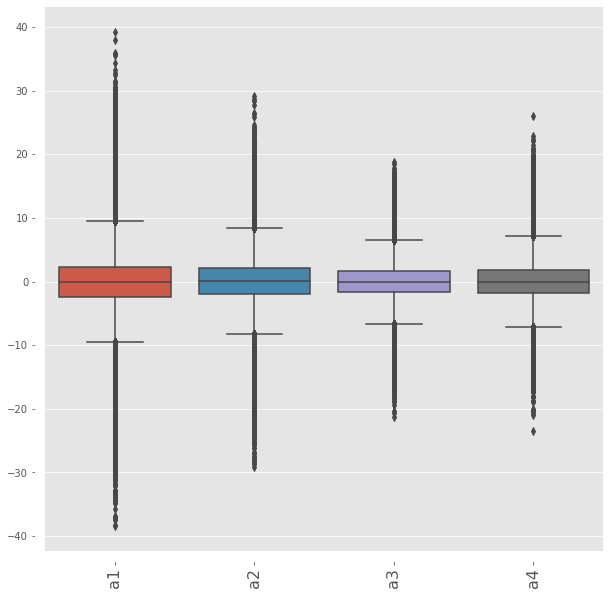

In [199]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data_atrib)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90, fontsize=16)

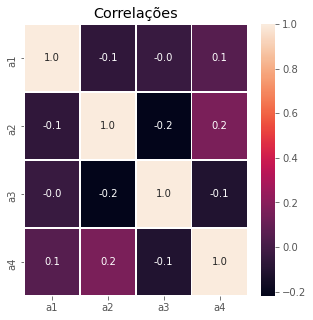

In [200]:
#correlation map
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(data_atrib.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlações')
plt.show()

In [201]:
'''
g = sns.pairplot(data, hue='class', markers='+')
plt.show()
'''

"\ng = sns.pairplot(data, hue='class', markers='+')\nplt.show()\n"

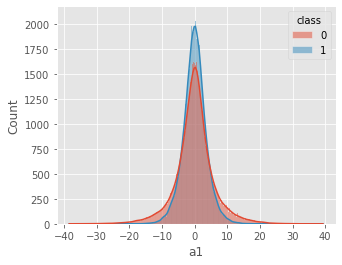

In [202]:
plt.figure(figsize=(5,4))
ax = sns.histplot(data=data, x="a1", hue="class",kde=True)

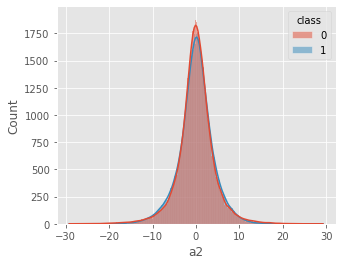

In [203]:
plt.figure(figsize=(5,4))
ax = sns.histplot(data=data, x="a2", hue="class",kde=True)

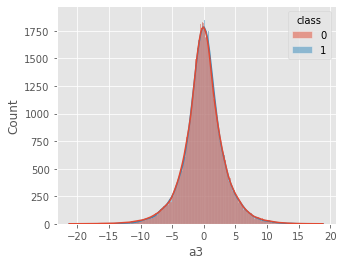

In [204]:
plt.figure(figsize=(5,4))
ax = sns.histplot(data=data, x="a3", hue="class",kde=True)

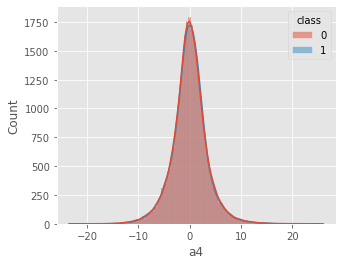

In [205]:
plt.figure(figsize=(5,4))
ax = sns.histplot(data=data, x="a4", hue="class",kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


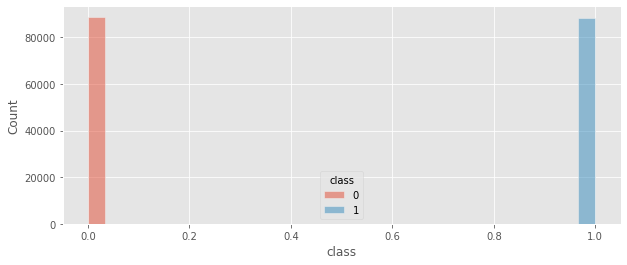

In [206]:
plt.figure(figsize=(10,4))
ax = sns.histplot(data=data, x="class", hue="class",kde=True)

In [207]:
# Split o dataset e definindo as variáveis de treino e teste 
X = data.drop("class", axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3,stratify = y, random_state=42)

#Pré-processamento 

##retirarando os outliers

In [208]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
transformer
RobustScaler()
Xr=transformer.transform(X)

In [209]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, y, test_size=1/3,stratify = y, random_state=42)

##Normalização

In [210]:
from sklearn.preprocessing import MinMaxScaler

In [211]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(data.iloc[:,:-1])

MinMaxScaler(copy=True, feature_range=(-1, 1))

In [212]:
data_Norm = scaler.transform(data.iloc[:,:-1])

In [213]:
data_Norm = pd.DataFrame(scaler.transform(data.iloc[:,:-1]), columns=data.iloc[:,:-1].columns) 

In [214]:
data_Norm

,a1,a2,a3,a4
0,0.049529,0.048904,-0.022244,-0.134314
1,0.052170,0.047028,-0.080021,-0.011302
2,-0.017197,-0.010103,0.100524,-0.026622
3,0.018115,-0.031467,0.095706,-0.026331
4,-0.044355,0.032651,0.004525,-0.065177
...,...,...,...,...
177147,0.061339,-0.118152,0.201509,0.168115
177148,0.296749,0.058620,0.271249,0.175557
177149,0.157144,-0.108105,-0.069804,-0.178999
177150,-0.232772,0.184778,-0.266325,-0.072153


In [215]:
#df_Normalized = pd.concat([data_Norm,data.iloc[:,-1]], axis=1)

In [216]:
Xn = data_Norm
yn = data['class']

In [217]:
data['class'].value_counts()

0    88832
1    88320
Name: class, dtype: int64

In [218]:
data_Norm['a1'].describe()

count    177152.000000
mean         -0.011279
std           0.126203
min          -1.000000
25%          -0.072615
50%          -0.010727
75%           0.049989
max           1.000000
Name: a1, dtype: float64

In [219]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=1/3,stratify = yn, random_state=42)

#Classificadores


##Dummy Classifier

In [119]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(X_train, y_train)
previsao_dummy = modelo_dummy.predict(X_test)
accuracy_score(y_test, previsao_dummy)

0.5014479009669608

##Árvores de Decisão

###Entropia

In [120]:
#Variar os hiperparametros de tamanho da árvore
depth_range = list(range(1, 20))
print(depth_range)

param_grid_tree = dict(max_depth=depth_range)
print(param_grid_tree)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}


In [121]:
"""
#Fazendo um dicionário chamado param_grid contendo os parâmetros que serão variados também o tipo de algoritmo
param_grid_tree['criterion'] = ['entropy','gini']
"""

"\n#Fazendo um dicionário chamado param_grid contendo os parâmetros que serão variados também o tipo de algoritmo\nparam_grid_tree['criterion'] = ['entropy','gini']\n"

In [122]:
#Criando o objeto GridSearch e treinando o modelo com os melhores hiperparâmetros

grid_tree = GridSearchCV(DecisionTreeClassifier(criterion = 'entropy'), param_grid_tree, refit = True, verbose=3, cv=5)
grid_tree.fit(X_train, y_train)
print("-----------------------------------------------------------")
print("melhor estimador: ",grid_tree.best_estimator_)
print("melhores Parâmetros: ",grid_tree.best_params_)
print("Melhor score: ",grid_tree.score(X_test, y_test))

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] max_depth=1 .....................................................
[CV] ......................... max_depth=1, score=0.525, total=   0.2s
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ......................... max_depth=1, score=0.518, total=   0.1s
[CV] max_depth=1 .....................................................
[CV] ......................... max_depth=1, score=0.519, total=   0.1s
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ......................... max_depth=1, score=0.521, total=   0.1s
[CV] max_depth=1 .....................................................
[CV] ......................... max_depth=1, score=0.521, total=   0.1s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.552, total=   0.2s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.546, total=   0.2s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.546, total=   0.2s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.548, total=   0.2s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.543, total=   0.2s
[CV] max_depth=3 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:  1.6min finished


-----------------------------------------------------------
melhor estimador:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=13, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
melhores Parâmetros:  {'max_depth': 13}
Melhor score:  0.59059118389189


In [167]:
#Criando objeto da árvore de decisão e treinando
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth= 13)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=13, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [124]:
#Computar a acurácia do teste
test_accuracy_tree = clf.score(X_test, y_test)
print('Acurácia do teste = ' ,test_accuracy_tree)

predictions_tree = clf.predict(X_test)
print(confusion_matrix(y_test, predictions_tree))
print(classification_report(y_test, predictions_tree))

Acurácia do teste =  0.5917257963455318
[[10939 18672]
 [ 5437 24003]]
              precision    recall  f1-score   support

           0       0.67      0.37      0.48     29611
           1       0.56      0.82      0.67     29440

    accuracy                           0.59     59051
   macro avg       0.62      0.59      0.57     59051
weighted avg       0.62      0.59      0.57     59051



A precisão está ruím!!!! A quantidade de false positive está gigante.  Isto é, a quantidade que ele classifica como falha, mas que não foi falha está grande.

---

No entanto, a cobertura é muito boa


###CART

In [125]:
#Variar os hiperparametros de tamanho da árvore
depth_cart = list(range(1, 20))
print(depth_cart)

param_grid_cart = dict(max_depth=depth_cart)
print(param_grid_cart)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}


In [126]:
#Criando o objeto GridSearch e treinando o modelo com os melhores hiperparâmetros

grid_CART = GridSearchCV(DecisionTreeClassifier(criterion = 'gini'), param_grid_cart, refit = True, verbose=3, cv=5)
grid_CART.fit(X_train, y_train)
print("-----------------------------------------------------------")
print("melhor estimador: ",grid_CART.best_estimator_)
print("melhores Parâmetros: ",grid_CART.best_params_)
print("Melhor score: ",grid_CART.score(X_test, y_test))

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] max_depth=1 .....................................................
[CV] ......................... max_depth=1, score=0.526, total=   0.1s
[CV] max_depth=1 .....................................................
[CV] ......................... max_depth=1, score=0.522, total=   0.1s
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ......................... max_depth=1, score=0.525, total=   0.1s
[CV] max_depth=1 .....................................................
[CV] ......................... max_depth=1, score=0.523, total=   0.1s
[CV] max_depth=1 .....................................................
[CV] ......................... max_depth=1, score=0.526, total=   0.1s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.553, total=   0.2s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.553, total=   0.2s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.556, total=   0.1s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.551, total=   0.1s
[CV] max_depth=2 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:   55.0s finished


-----------------------------------------------------------
melhor estimador:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=13, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
melhores Parâmetros:  {'max_depth': 13}
Melhor score:  0.5876107093868013


In [127]:
#Criando objeto da árvore de decisão e treinando
clfCART = tree.DecisionTreeClassifier(criterion = 'gini', max_depth= 13)
clfCART.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [128]:
#Computar a acurácia do teste
test_accuracy_CART = clfCART.score(X_test, y_test)
print('Acurácia do teste = ' ,test_accuracy_CART)

predictions_CART = clfCART.predict(X_test)
print(confusion_matrix(y_test, predictions_CART))
print(classification_report(y_test, predictions_CART))

Acurácia do teste =  0.5894396369240148
[[10835 18776]
 [ 5468 23972]]
              precision    recall  f1-score   support

           0       0.66      0.37      0.47     29611
           1       0.56      0.81      0.66     29440

    accuracy                           0.59     59051
   macro avg       0.61      0.59      0.57     59051
weighted avg       0.61      0.59      0.57     59051



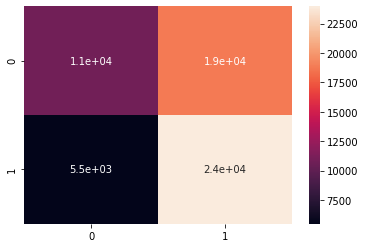

In [129]:
cm = pd.DataFrame(confusion_matrix(y_test, predictions_CART))
sns.heatmap(cm, annot=True)

##Random Forest


In [130]:
#Tentei usar um número grande de árvores votantes, mas ficou muito lento
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

In [131]:
#Variar os hiperparametros de tamanho do número de árvores votantes
estimadores = [10,20,50,100]

In [132]:
param_grid_RF = dict(n_estimators=estimadores)
print(param_grid_RF)

{'n_estimators': [10, 20, 50, 100]}


In [133]:
#Criando o objeto GridSearch e treinando o modelo com os melhores hiperparâmetros

grid_RF = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid_RF, refit = True, verbose=3, cv=5)
grid_RF.fit(X_train, y_train)
print("-----------------------------------------------------------")
print("melhor estimador: ",grid_RF.best_estimator_)
print("melhores Parâmetros: ",grid_RF.best_params_)
print("Melhor score: ",grid_RF.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... n_estimators=10, score=0.573, total=   4.4s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[CV] ..................... n_estimators=10, score=0.565, total=   4.5s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.9s remaining:    0.0s


[CV] ..................... n_estimators=10, score=0.574, total=   4.5s
[CV] n_estimators=10 .................................................
[CV] ..................... n_estimators=10, score=0.572, total=   4.4s
[CV] n_estimators=10 .................................................
[CV] ..................... n_estimators=10, score=0.570, total=   4.6s
[CV] n_estimators=20 .................................................
[CV] ..................... n_estimators=20, score=0.582, total=   8.8s
[CV] n_estimators=20 .................................................
[CV] ..................... n_estimators=20, score=0.573, total=   8.9s
[CV] n_estimators=20 .................................................
[CV] ..................... n_estimators=20, score=0.578, total=   8.9s
[CV] n_estimators=20 .................................................
[CV] ..................... n_estimators=20, score=0.579, total=   8.7s
[CV] n_estimators=20 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  6.6min finished


-----------------------------------------------------------
melhor estimador:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
melhores Parâmetros:  {'n_estimators': 100}
Melhor score:  0.5845963658532455


In [134]:
#Criando objeto da árvore de decisão e treinando
rf = RandomForestClassifier(random_state = 42, n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [135]:
#Computar a acurácia do teste
test_accuracy_rf = rf.score(X_test, y_test)
print('Acurácia do teste = ' ,test_accuracy_rf)

predictions_rf = rf.predict(X_test)
print(confusion_matrix(y_test, predictions_rf))
print(classification_report(y_test, predictions_rf))

Acurácia do teste =  0.5845963658532455
[[16563 13048]
 [11482 17958]]
              precision    recall  f1-score   support

           0       0.59      0.56      0.57     29611
           1       0.58      0.61      0.59     29440

    accuracy                           0.58     59051
   macro avg       0.58      0.58      0.58     59051
weighted avg       0.58      0.58      0.58     59051



In [136]:
#cm = pd.DataFrame(confusion_matrix(y_test, predictions_rf), columns=data.target_names, index=data.target_names)
#sns.heatmap(cm, annot=True)

##K-NN

Foi testado o grid para chegar no melhor k para o KNN, mas optou-se em testar todos os valores de k de forma direta.

In [137]:
#Variar os parametros de tamanho do KNN
param_grid_KNN = dict(n_neighbors=list(range(1, 100,2)))
print(param_grid_KNN)

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]}


In [138]:
#Criando o objeto GridSearch e treinando o modelo com os melhores hiperparâmetros

"""grid_KNN = GridSearchCV(KNeighborsClassifier(), param_grid_KNN, refit = True, verbose=3, cv=5)
grid_KNN.fit(Xn_train, yn_train)

print("-----------------------------------------------------------")
print("melhor estimador: ",grid_KNN.best_estimator_)
print("melhores Parâmetros: ",grid_KNN.best_params_)
print("Melhor score: ",grid_KNN.score(X_test, y_test))

"""

'grid_KNN = GridSearchCV(KNeighborsClassifier(), param_grid_KNN, refit = True, verbose=3, cv=5)\ngrid_KNN.fit(Xn_train, yn_train)\n\nprint("-----------------------------------------------------------")\nprint("melhor estimador: ",grid_KNN.best_estimator_)\nprint("melhores Parâmetros: ",grid_KNN.best_params_)\nprint("Melhor score: ",grid_KNN.score(X_test, y_test))\n\n'

In [139]:
#treinando o KNN com os melhores parâmetros
KNN = KNeighborsClassifier(n_neighbors=95)
KNN.fit(Xn_train, yn_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=95, p=2,
                     weights='uniform')

In [140]:
"""
#Computar a acurácia do teste
test_accuracy_KNN = KNN.score(Xn_test, yn_test)
print("Acurácia do teste = %0.4f" % (test_accuracy_KNN))

predictions_KNN = KNN.predict(Xn_test)
print(confusion_matrix(yn_test, predictions_KNN))
print(classification_report(yn_test, predictions_KNN))
"""

Acurácia do teste = 0.6047
[[15414 14197]
 [ 9144 20296]]
              precision    recall  f1-score   support

           0       0.63      0.52      0.57     29611
           1       0.59      0.69      0.63     29440

    accuracy                           0.60     59051
   macro avg       0.61      0.60      0.60     59051
weighted avg       0.61      0.60      0.60     59051



In [141]:
ListaKNN={}
res_test = []
test_accuracy = 0
val_max = 200
for i in range(1,val_max,2):
  KNN_teste = KNeighborsClassifier(n_neighbors=i)
  KNN_teste.fit(Xn_train, yn_train)
  #Computar a acurácia do teste
  test_accuracy = KNN_teste.score(Xn_test, yn_test)
  res_test.append(test_accuracy) 
  #print('Com k = ',i, ', a Acurácia do teste = ' ,test_accuracy)
  ListaKNN['KNN'+str(i)]=round(test_accuracy,3)

In [142]:
neighbors = np.arange(1,val_max,2)

In [143]:
valoresKNN = []
for item in ListaKNN.values():
  valoresKNN.append(item)

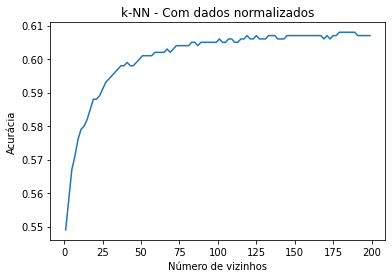

In [144]:
#Generate plot
plt.title('k-NN - Com dados normalizados')
plt.plot(neighbors,valoresKNN, label='Acurácia do Teste')
plt.xlabel('Número de vizinhos')
plt.ylabel('Acurácia')
plt.show()

In [145]:
max(ListaKNN, key=ListaKNN.get)

'KNN179'

In [146]:
max(res_test)

0.6083216202943219

In [168]:
ListaKNN['KNN179']

0.608

In [148]:
#treinando o KNN com o k de maior acurárica
KNN = KNeighborsClassifier(n_neighbors=179)
KNN.fit(Xn_train, yn_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=197, p=2,
                     weights='uniform')

In [149]:
#Computar a acurácia do teste
test_accuracy_KNN = KNN.score(Xn_test, yn_test)
print("Acurácia do teste = %0.4f" % (test_accuracy_KNN))

predictions_KNN = KNN.predict(Xn_test)
print(confusion_matrix(yn_test, predictions_KNN))
print(classification_report(yn_test, predictions_KNN))

Acurácia do teste = 0.6072
[[14984 14627]
 [ 8568 20872]]
              precision    recall  f1-score   support

           0       0.64      0.51      0.56     29611
           1       0.59      0.71      0.64     29440

    accuracy                           0.61     59051
   macro avg       0.61      0.61      0.60     59051
weighted avg       0.61      0.61      0.60     59051



##NB

In [150]:
#Fazendo um dicionário chamado param_grid contendo os hiperparâmetros que serão variados
parameters_NB = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}

In [151]:
n#Criando o objeto GridSearch e treinando o modelo com os melhores hiperparâmetros
grid_NB = GridSearchCV(GaussianNB(), parameters_NB, refit = True, verbose=3, cv=10)
grid_NB.fit(X_train, y_train)


Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.558, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.568, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.565, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.567, total=   0.0s
[CV] var_smoothing=0.01 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .................. var_smoothing=0.01, score=0.567, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.565, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.566, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.569, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.570, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.562, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] ................. var_smoothing=0.001, score=0.557, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.0s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': [0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                           1e-07, 1e-08, 1e-09, 1e-10, 1e-11,
                                           1e-12, 1e-13, 1e-14, 1e-15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [152]:
print("-----------------------------------------------------------")
print("melhor estimador: ",grid_NB.best_estimator_)
print("melhores Parâmetros: ",grid_NB.best_params_)
print("Melhor score: ",grid_NB.score(X_test, y_test))

-----------------------------------------------------------
melhor estimador:  GaussianNB(priors=None, var_smoothing=0.01)
melhores Parâmetros:  {'var_smoothing': 0.01}
Melhor score:  0.5603461414709319


In [169]:
# treinando com os melhores parâmetros
NB = GaussianNB(var_smoothing = 0.01)
NB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=0.01)

In [170]:
#Computar a acurácia do teste
test_accuracy_NB = NB.score(X_test, y_test)
print("Acurácia do teste = %0.4f" % (test_accuracy_NB))

predictions_NB = NB.predict(X_test)
print(confusion_matrix(y_test, predictions_NB))
print(classification_report(y_test, predictions_NB))

Acurácia do teste = 0.5603
[[ 9676 19935]
 [ 6027 23413]]
              precision    recall  f1-score   support

           0       0.62      0.33      0.43     29611
           1       0.54      0.80      0.64     29440

    accuracy                           0.56     59051
   macro avg       0.58      0.56      0.54     59051
weighted avg       0.58      0.56      0.53     59051



##SVM

SVM levando muito tempo.  Não será levado em consideração?

In [155]:
#Fazendo um dicionário chamado param_grid contendo os parâmetros que serão variados C e Gamma
param_SVM = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001],'kernel':['rbf', 'poly'],'degree':[2, 3, 4, 5]}

In [156]:
#Criando o objeto GridSearch e treinando o modelo com os melhores hiperparâmetros

"""grid_SVM = GridSearchCV(SVC(), param_SVM, refit = True, verbose=3, cv=5)
grid_SVM.fit(Xn_train, yn_train)"""

'grid_SVM = GridSearchCV(SVC(), param_SVM, refit = True, verbose=3, cv=5)\ngrid_SVM.fit(Xn_train, yn_train)'

In [157]:
"""print(grid_SVM.best_estimator_)

print(grid_SVM.best_params_)

print(grid_SVM.score(Xn_test, yn_test))
"""

'print(grid_SVM.best_estimator_)\n\nprint(grid_SVM.best_params_)\n\nprint(grid_SVM.score(Xn_test, yn_test))\n'

In [158]:
"""# treinando com os melhores parâmetros
SVM = SVC(kernel='poly')
SVM.fit(Xn_train, yn_train)"""

"# treinando com os melhores parâmetros\nSVM = SVC(kernel='poly')\nSVM.fit(Xn_train, yn_train)"

In [159]:
"""#Computar a acurácia do teste
test_accuracy_SVM = SVM.score(Xn_test, yn_test)
print("Acurácia do teste = %0.4f" % (test_accuracy_SVM))

predictions_SVM = SVM.predict(X_test)
print(confusion_matrix(yn_test, predictions_SVM))
print(classification_report(yn_test, predictions_SVM))"""

'#Computar a acurácia do teste\ntest_accuracy_SVM = SVM.score(Xn_test, yn_test)\nprint("Acurácia do teste = %0.4f" % (test_accuracy_SVM))\n\npredictions_SVM = SVM.predict(X_test)\nprint(confusion_matrix(yn_test, predictions_SVM))\nprint(classification_report(yn_test, predictions_SVM))'

##MLP

Grid levando muito tempo.  Hiperparâmetros não serão variados

In [160]:
# Criando objeto e treinando o modelo
MLP = MLPClassifier(max_iter=10000)


In [161]:
#Além dos parâmetros de neurônios das camadas intermediárias, busquei variar outros para avaliar os resultados.
parameter_space2 = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [162]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
   
}

In [163]:
#Criando o objeto GridSearch e treinando o modelo com os melhores hiperparâmetros
"""
grid_MLP = GridSearchCV(MLP, parameter_space, refit = True, verbose=3, cv=5)
grid_MLP.fit(Xn_train, yn_train)
"""

'\ngrid_MLP = GridSearchCV(MLP, parameter_space, refit = True, verbose=3, cv=5)\ngrid_MLP.fit(Xn_train, yn_train)\n'

In [164]:
"""print(grid_SVM.best_estimator_)

print(grid_SVM.best_params_)

print(grid_SVM.score(Xn_test, yn_test))
"""

'print(grid_SVM.best_estimator_)\n\nprint(grid_SVM.best_params_)\n\nprint(grid_SVM.score(Xn_test, yn_test))\n'

In [165]:
# Treinando o modelo
MLP = MLPClassifier(max_iter=10000)
MLP.fit(Xn_train, yn_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [184]:
#Computar a acurácia do teste
test_accuracy_MLP = MLP.score(Xn_test, yn_test)
print("Acurácia do teste = %0.4f" % (test_accuracy_MLP))

predictions_MLP = MLP.predict(Xn_test)
print(confusion_matrix(yn_test, predictions_MLP))
print(classification_report(yn_test, predictions_MLP))

Acurácia do teste = 0.6097
[[15457 14154]
 [ 8893 20547]]
              precision    recall  f1-score   support

           0       0.63      0.52      0.57     29611
           1       0.59      0.70      0.64     29440

    accuracy                           0.61     59051
   macro avg       0.61      0.61      0.61     59051
weighted avg       0.61      0.61      0.61     59051





---



---



#Teste da acurácia com diversos modelos usando o 10-fold cross validation para comparação

In [232]:
seed=42
models = []
models_results = []
scoring='accuracy'
models.append(('TREE', DecisionTreeClassifier(criterion = 'entropy', max_depth= 13)))
models.append(('CART', DecisionTreeClassifier(criterion = 'gini', max_depth= 13)))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=179)))
models.append(('NB', GaussianNB(priors=None, var_smoothing=0.01)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100)))
models.append(('Isolation Forest',IsolationForest()))
models.append(('MLP',MLPClassifier(max_iter=10000)))

#models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle = True)
    cv_results = model_selection.cross_val_score(model, Xn_train, yn_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    lista = [name, cv_results.mean(), cv_results.std()]
    models_results.append(lista)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

TREE: 0.594982 (0.003986)
CART: 0.592053 (0.003511)
LR: 0.500478 (0.004052)
LDA: 0.500462 (0.004073)
KNN: 0.609182 (0.004047)
NB: 0.565440 (0.003424)
Random Forest: 0.587861 (0.002104)
Isolation Forest: 0.448455 (0.007139)
MLP: 0.612120 (0.003912)


In [221]:
models_results

[['TREE', 0.5948722129394584, 0.003958832475894167],
 ['CART', 0.5920017849575637, 0.0035286948660163903],
 ['LR', 0.5004784651228913, 0.0040519744087577705],
 ['LDA', 0.5004615324725992, 0.004072546458554841],
 ['KNN', 0.6091820043758631, 0.004046842619924553],
 ['NB', 0.5654396972468797, 0.003424361297725274],
 ['Random Forest', 0.5875310612941294, 0.003855591661416324],
 ['Isolation Forest', 0.4466177090186526, 0.005218666337860722],
 ['MLP', 0.611493592527123, 0.0046276990470139525]]

In [233]:
df_results = pd.DataFrame(models_results, 
                          columns = ['modelo','Acuracia_k-fold=10','Desvio-padrão'])
df_results.sort_values(by='Acuracia_k-fold=10', ascending=False, inplace=True)
df_results.reset_index(inplace=True,drop=True)
df_results

,modelo,Acuracia_k-fold=10,Desvio-padrão
0,MLP,0.612120,0.003912
1,KNN,0.609182,0.004047
2,TREE,0.594982,0.003986
3,CART,0.592053,0.003511
4,Random Forest,0.587861,0.002104
5,NB,0.565440,0.003424
6,LR,0.500478,0.004052
7,LDA,0.500462,0.004073
8,Isolation Forest,0.448455,0.007139


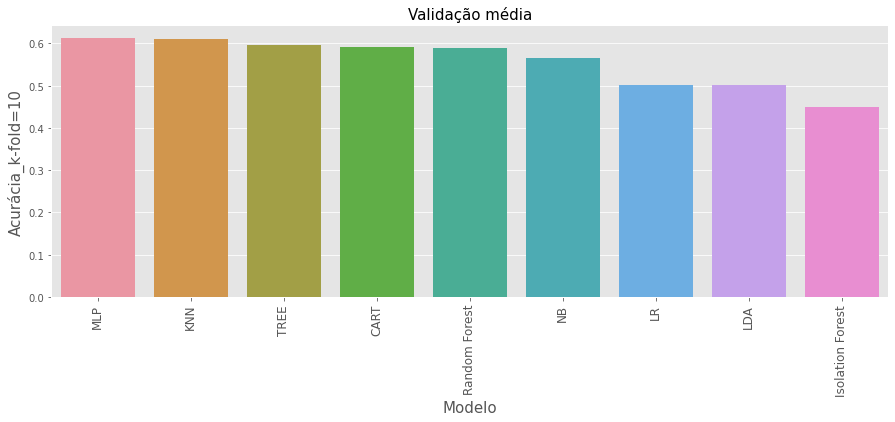

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.figure(figsize = (15,5))
sns.barplot(x = "modelo", y = "Acuracia_k-fold=10", data = df_results)
plt.title('Validação média', fontsize = 15)
#plt.ylim(0.8,1)
plt.xlabel('Modelo', fontsize=15)
plt.ylabel('Acurácia_k-fold=10',fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [224]:
models


[('TREE',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                         max_depth=13, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best')),
 ('CART',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=13, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best')),
 ('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            

# PCA

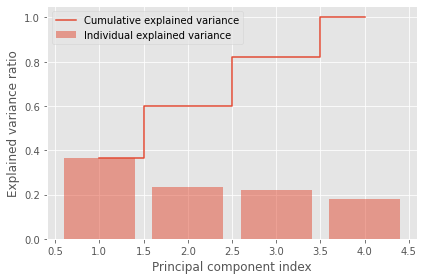

In [225]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(Xn_train)
# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
# Create the visualization plot

plt.bar(range(1,len(exp_var_pca)+1), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,len(cum_sum_eigenvalues)+1), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [226]:
N=3
columns_vector = ['element '+str(i) for i in range(1,N+1)]
pca = PCA(n_components=3)
df_PCA = pca.fit_transform(data_Norm)
df_PCA = pd.DataFrame(data = df_PCA
             , columns = columns_vector)
df_PCA

,element 1,element 2,element 3
0,-0.065625,0.086738,0.007816
1,-0.151242,0.032319,-0.055085
2,0.029556,-0.035959,-0.007673
3,0.035157,-0.021186,-0.044934
4,-0.056010,0.022619,0.042187
...,...,...,...
177147,0.099481,-0.174674,-0.196727
177148,0.061291,-0.276530,-0.288102
177149,-0.015490,0.222495,-0.131528
177150,-0.342960,0.092729,0.236409


###Treino e Teste com os dados após o PCA

In [227]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(df_PCA, y, test_size=1/3,stratify = y, random_state=42)

In [228]:
seed=42
models = []
models_results_pca = []
scoring='accuracy'
models.append(('TREE', DecisionTreeClassifier(criterion = 'entropy', max_depth= 13)))
models.append(('CART', DecisionTreeClassifier(criterion = 'gini', max_depth= 13)))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=179)))
models.append(('NB', GaussianNB(priors=None, var_smoothing=0.01)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100)))
models.append(('Isolation Forest',IsolationForest()))
models.append(('MLP',MLPClassifier(max_iter=10000)))
#models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results_pca = []
names_pca = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle = True)
    cv_results = model_selection.cross_val_score(model, X_train_pca, y_train_pca, cv=kfold, scoring=scoring)
    results_pca.append(cv_results)
    names_pca.append(name)
    listapca = [name, cv_results.mean(), cv_results.std()]
    models_results_pca.append(listapca)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

TREE: 0.550139 (0.003973)
CART: 0.549242 (0.002286)
LR: 0.507100 (0.004877)
LDA: 0.507083 (0.004963)
KNN: 0.557684 (0.003479)
NB: 0.537125 (0.003676)
Random Forest: 0.536956 (0.003894)
Isolation Forest: 0.435314 (0.005122)
MLP: 0.561062 (0.003333)


In [229]:
models_results_pca

[['TREE', 0.550139314582891, 0.003973418442383165],
 ['CART', 0.5492417622430503, 0.0022855338173242536],
 ['LR', 0.5070999042139208, 0.00487675258208878],
 ['LDA', 0.5070829708467207, 0.004963383714867725],
 ['KNN', 0.5576836601824489, 0.0034791363959982137],
 ['NB', 0.5371249816561162, 0.003675850844266313],
 ['Random Forest', 0.5369556924324123, 0.00389440549318818],
 ['Isolation Forest', 0.4353137773732505, 0.005121583650911553],
 ['MLP', 0.5610621580035144, 0.0033328345799938067]]

In [230]:
df_results_pca = pd.DataFrame(models_results_pca, 
                          columns = ['modelo','Acuracia_k-fold=10 com PCA','Desvio-padrão'])
df_results_pca.sort_values(by='Acuracia_k-fold=10 com PCA', ascending=False, inplace=True)
df_results_pca.reset_index(inplace=True,drop=True)
df_results_pca

,modelo,Acuracia_k-fold=10 com PCA,Desvio-padrão
0,MLP,0.561062,0.003333
1,KNN,0.557684,0.003479
2,TREE,0.550139,0.003973
3,CART,0.549242,0.002286
4,NB,0.537125,0.003676
5,Random Forest,0.536956,0.003894
6,LR,0.507100,0.004877
7,LDA,0.507083,0.004963
8,Isolation Forest,0.435314,0.005122


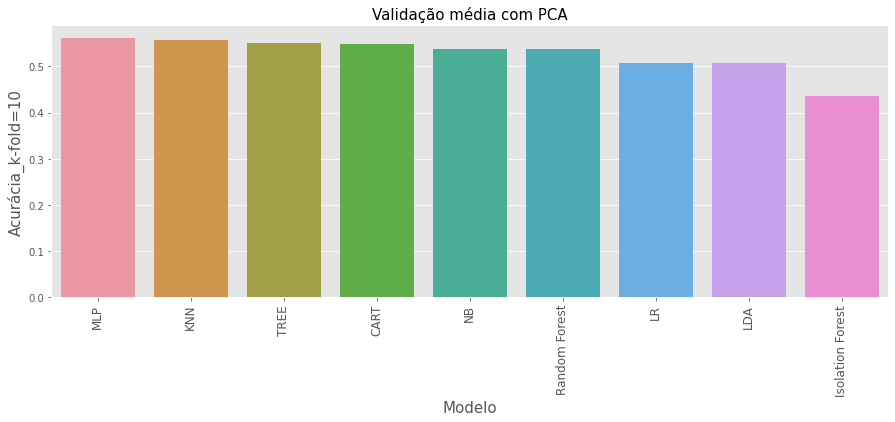

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.figure(figsize = (15,5))
sns.barplot(x = "modelo", y = "Acuracia_k-fold=10 com PCA", data = df_results_pca)
plt.title('Validação média com PCA', fontsize = 15)
#plt.ylim(0.8,1)
plt.xlabel('Modelo', fontsize=15)
plt.ylabel('Acurácia_k-fold=10',fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.show()